<a href="https://colab.research.google.com/github/joseaneOliF/reducao-dimensionalidades-imagens/blob/main/reducaoDeDimensionalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

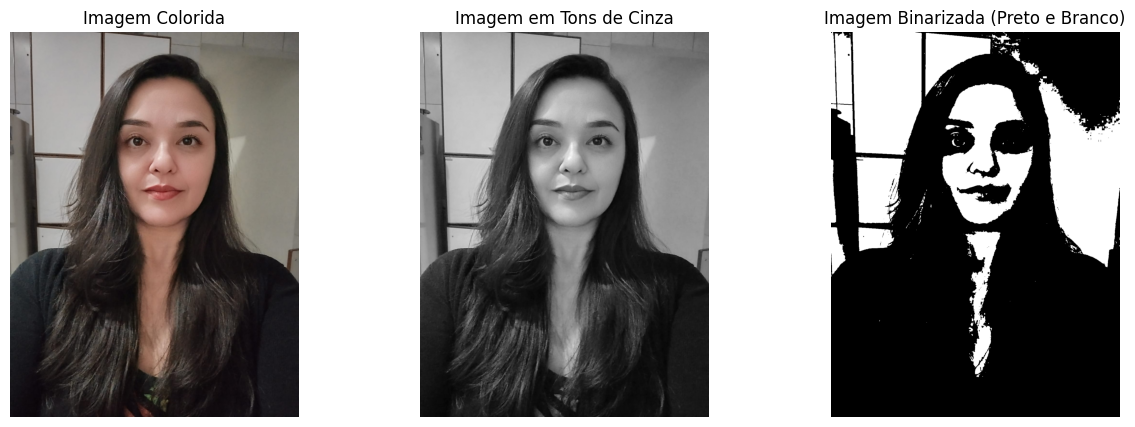

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem usando PIL
imagem = Image.open("./IMAGEM/Eu.jpeg")

# Converter para matriz NumPy (RGB)
imagem_np = np.array(imagem)

# Converter para tons de cinza manualmente
def rgb_para_cinza(imagem_rgb):
    altura, largura, _ = imagem_rgb.shape
    imagem_cinza = np.zeros((altura, largura), dtype=np.uint8)

    for i in range(altura):
        for j in range(largura):
            r, g, b = imagem_rgb[i, j]
            # Fórmula de conversão para tons de cinza: Y = 0.2989*R + 0.5870*G + 0.1140*B
            imagem_cinza[i, j] = int(0.2989 * r + 0.5870 * g + 0.1140 * b)

    return imagem_cinza

imagem_cinza = rgb_para_cinza(imagem_np)

# Função para binarizar a imagem (usando um limiar de 127)
def binarizar(imagem_cinza, limiar=127):
    altura, largura = imagem_cinza.shape
    imagem_binaria = np.zeros((altura, largura), dtype=np.uint8)

    for i in range(altura):
        for j in range(largura):
            if imagem_cinza[i, j] > limiar:
                imagem_binaria[i, j] = 255  # Branco
            else:
                imagem_binaria[i, j] = 0    # Preto

    return imagem_binaria

imagem_binaria = binarizar(imagem_cinza, limiar=127)

# Exibir as imagens
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(imagem_np)
axs[0].set_title("Imagem Colorida")
axs[0].axis("off")

axs[1].imshow(imagem_cinza, cmap="gray")
axs[1].set_title("Imagem em Tons de Cinza")
axs[1].axis("off")

axs[2].imshow(imagem_binaria, cmap="gray")
axs[2].set_title("Imagem Binarizada (Preto e Branco)")
axs[2].axis("off")

plt.show()
